1. Complete all the EDA, data cleaning and feature engineering on Titanic dataset

2. Build a randomForest model to classify survivors, use k-fold cross-validation to tune model parameters 
(e.g. N_estimators, max_depth, max_features). You should build a grid for different combination of model parameters and evaluate the parameter set by looking at the best average AUC value.

3. Use your best set of parameters to train the model on the entire training dataset, apply the model to test dataset to evaluate the result.

4. Compare the performance between logistic regression and randomForest.

5. Output the importance of features based on randomForest model

### EDA, data cleaning and feature engineering on Titanic dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
test.shape

(418, 11)

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.shape

(891, 12)

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\18202\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


male      266
female    152
Name: Sex, dtype: int64

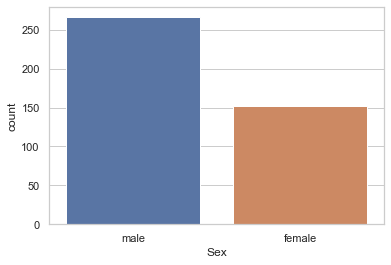

In [11]:
sns.countplot('Sex',data=test)
test['Sex'].value_counts()

Text(0, 0.5, 'Frequency')

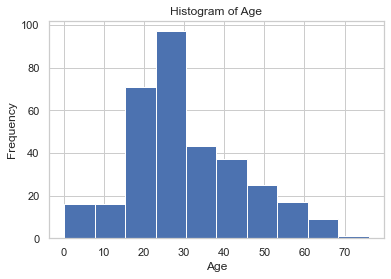

In [12]:
test.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

,Pclass,SibSp
0,1,0.476636
1,2,0.376344
2,3,0.463303


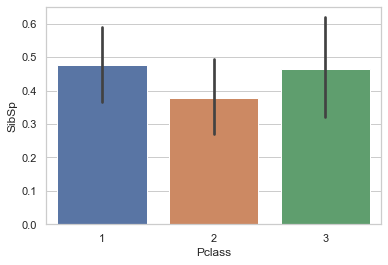

In [13]:
sns.barplot(x='Pclass',y='SibSp',data=test)
test.groupby('Pclass',as_index=False).SibSp.mean()

,Pclass,Age
0,1,40.918367
1,2,28.777500
2,3,24.027945


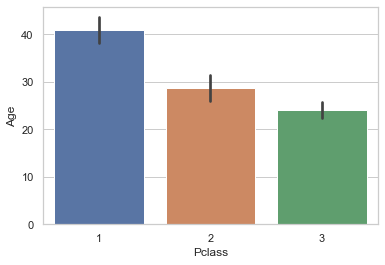

In [14]:
sns.barplot(x='Pclass',y='Age',data=test)
test.groupby('Pclass',as_index=False).Age.mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


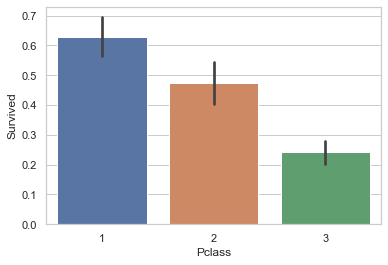

In [15]:
sns.barplot(x='Pclass',y='Survived',data=train)
train.groupby('Pclass',as_index=False).Survived.mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


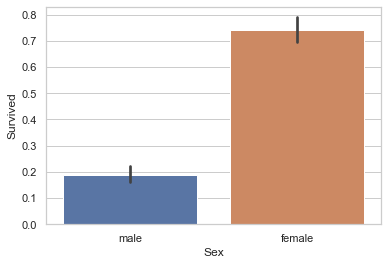

In [16]:
sns.barplot(x='Sex',y='Survived',data=train)
train.groupby('Sex',as_index=False).Survived.mean()

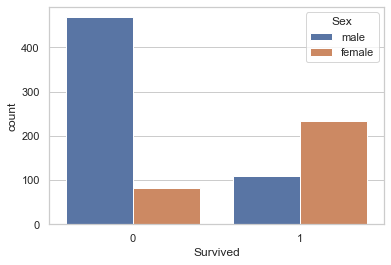

In [17]:
sns.countplot(x='Survived', hue='Sex', data=train)

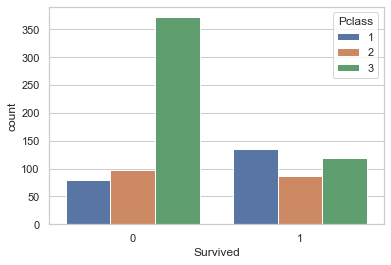

In [18]:
sns.countplot(x='Survived', hue='Pclass', data=train)

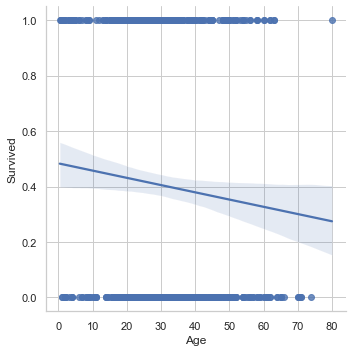

In [19]:
sns.lmplot(x='Age',y='Survived',data=train)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


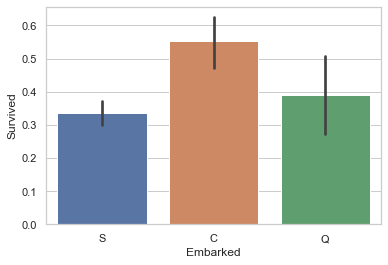

In [20]:
sns.barplot(x='Embarked',y='Survived',data=train)
train.groupby('Embarked',as_index=False).Survived.mean()

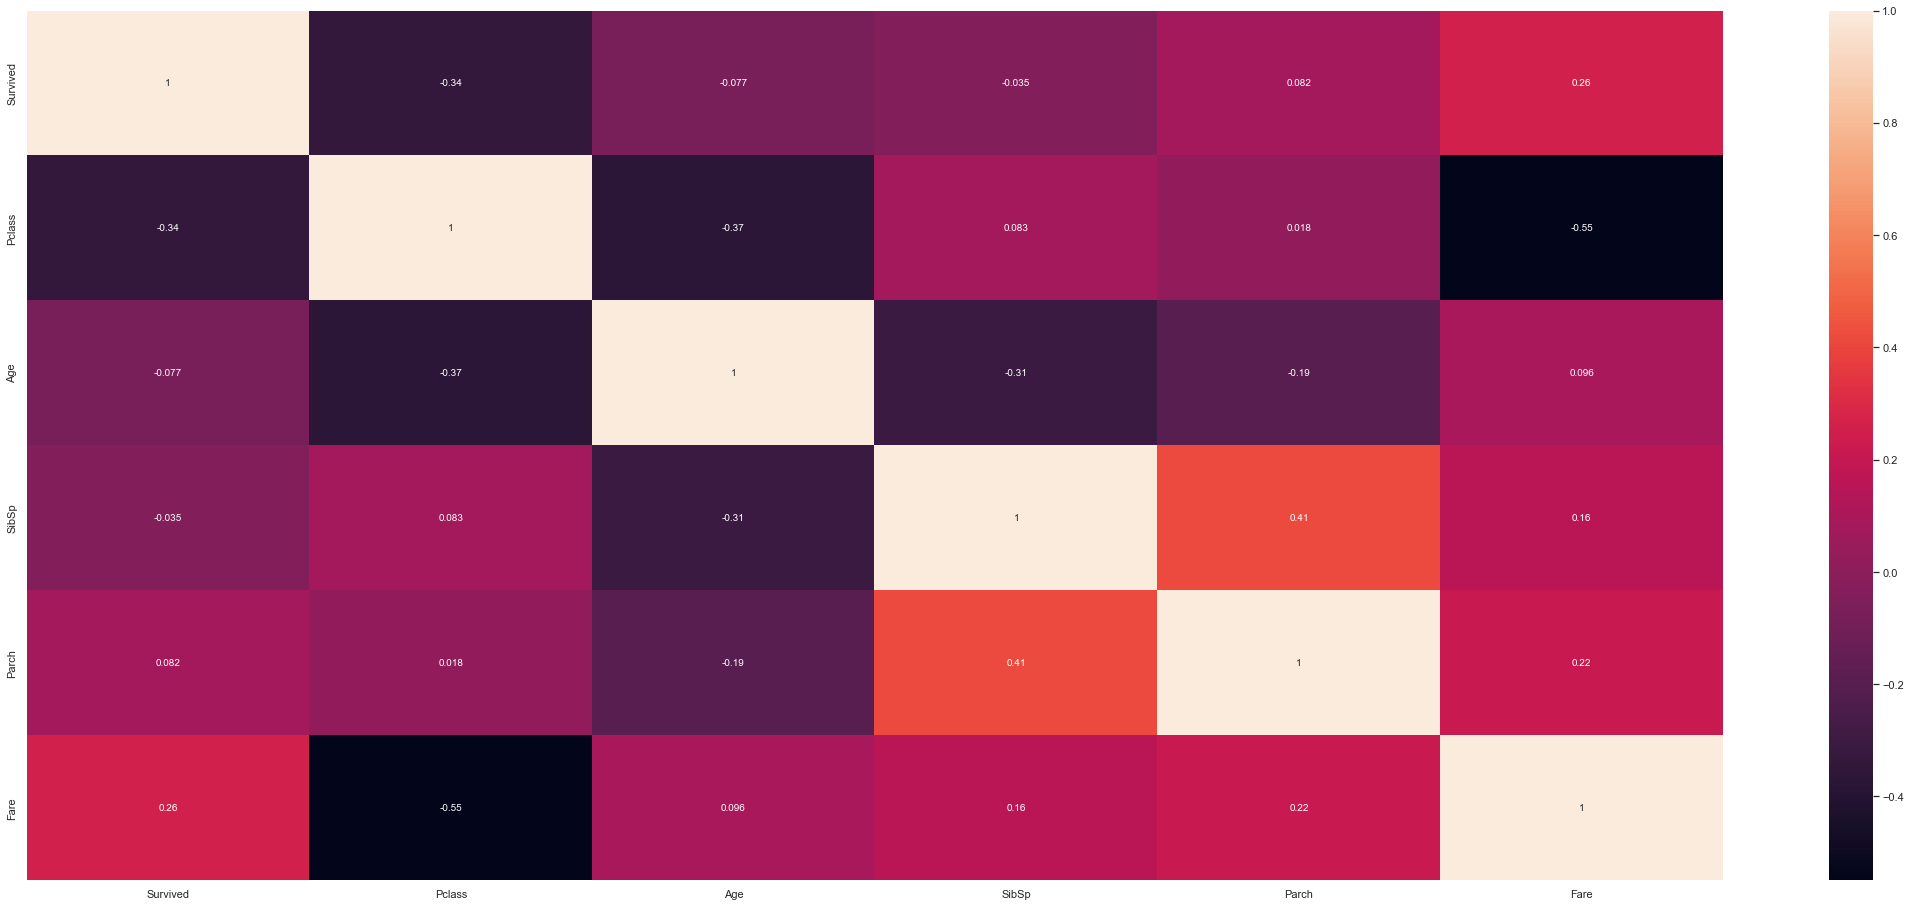

In [21]:
plt.figure(figsize = (38,16))
sns.heatmap(train.drop('PassengerId',axis = 1).corr(), annot = True)
# plt.savefig('heatmap.png')
plt.show()

In [ ]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(train, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        train[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.show()
draw_histograms(train,train.columns,8,4)

In [22]:
traindf = train.drop(['PassengerId'], axis=1)

In [23]:
targets = traindf['Survived']
traindf.drop(['Survived'], 1, inplace=True)

In [24]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Dona": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

In [25]:
traindf['Title'] = traindf['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
traindf['Title'] = traindf['Title'].map(Title_Dictionary)

In [26]:
fill_mean = lambda g: g.fillna(g.mean())
traindf['Age'] = traindf.groupby(['Sex', 'Title', 'Pclass'])['Age'].apply(fill_mean)

In [27]:
traindf.drop('Name', axis=1, inplace=True)

In [28]:
traindf.drop('Title', axis=1, inplace=True)

In [29]:
traindf.drop('Cabin', axis=1, inplace=True)

In [30]:
traindf.drop('Ticket', axis=1, inplace=True)

In [31]:
traindf['Fare'].fillna(traindf['Fare'].mean(), inplace=True)

In [32]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [33]:
traindf['Embarked'].fillna('S', inplace=True)

In [34]:
traindf_dummies = pd.get_dummies(traindf['Embarked'], prefix='Embarked')
traindf = pd.concat([traindf, traindf_dummies], axis=1)
traindf.drop('Embarked', axis=1, inplace=True)

In [35]:
traindf['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [36]:
traindf['Sex'] = traindf['Sex'].map({'male':1, 'female':0})

In [37]:
traindf['FamilySize'] = traindf['Parch'] + traindf['SibSp'] + 1

In [38]:
traindf

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,3,1,22.000000,1,0,7.2500,0,0,1,2
1,1,0,38.000000,1,0,71.2833,1,0,0,2
2,3,0,26.000000,0,0,7.9250,0,0,1,1
3,1,0,35.000000,1,0,53.1000,0,0,1,2
4,3,1,35.000000,0,0,8.0500,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0,0,1,1
887,1,0,19.000000,0,0,30.0000,0,0,1,1
888,3,0,16.123188,1,2,23.4500,0,0,1,4
889,1,1,26.000000,0,0,30.0000,1,0,0,1


In [39]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_C  891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
 9   FamilySize  891 non-null    int64  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB


In [40]:
traindf.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
FamilySize    0
dtype: int64

In [41]:
traindf.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.428608,0.523008,0.381594,32.204208,0.188552,0.086420,0.725028,1.904602
std,0.836071,0.477990,13.551875,1.102743,0.806057,49.693429,0.391372,0.281141,0.446751,1.613459
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,1.000000
50%,3.000000,1.000000,28.724891,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,1.000000
75%,3.000000,1.000000,36.750000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,2.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,11.000000


In [42]:
traindf = pd.get_dummies(traindf)

In [43]:
traindf.iloc[:,5:].head(5)

,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,7.2500,0,0,1,2
1,71.2833,1,0,0,2
2,7.9250,0,0,1,1
3,53.1000,0,0,1,2
4,8.0500,0,0,1,1


### Build a randomForest model 
to classify survivors, use k-fold cross-validation to tune model parameters (e.g. N_estimators, max_depth, max_features). 

You should build a grid for different combination of model parameters and evaluate the parameter set by looking at the best average AUC value.

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_all = traindf[['Pclass','Sex','Age']]

In [46]:
y_all = train['Survived']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, test_size=0.2, random_state=23)

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from time import time
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold, cross_val_score
from sklearn.grid_search import GridSearchCV


clf = RandomForestClassifier()

parameters = {'max_features': [1,3,5,7,9], 
              'max_depth': [3, None], 
              'min_samples_split': [2,3,4,5,6,7,8,9],
              'min_samples_leaf': [5,10,15,20,25],
              "bootstrap":[True, False],
              'criterion': ["gini", "entropy"]
             }
parameters

{'max_features': [1, 3, 5, 7, 9],
 'max_depth': [3, None],
 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9],
 'min_samples_leaf': [5, 10, 15, 20, 25],
 'bootstrap': [True, False],
 'criterion': ['gini', 'entropy']}

In [ ]:
acc_scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(x_train, y_train)

clf = grid_obj.best_estimator_
#clf.fit(x_train, y_train)

predictions = clf.predict(x_test)
print(accuracy_score(y_test, predictions))

In [ ]:
result[min_samples] = scores
    print(est, min_samples, results.mean(), results.std())
auc_values[est] = result

In [ ]:
print(grid_search.best_score_)
print(grid_search.best_params_)

In [ ]:
# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(x_train, y_train)

### Use your best set of parameters to train the model on the entire training dataset, apply the model to test dataset to evaluate the result.

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
rn = range(1,26)

In [ ]:
kf5 = KFold(n_splits=5, shuffle=False)
kf3 = KFold(n_splits=3, shuffle=False)

In [ ]:
i = 1
for train_index, test_index in kf3.split(train_df):
    x_train = train_df.iloc[train_index].loc[:, features]
    x_test = train_df.iloc[test_index][features]
    y_train = train_df.iloc[train_index].loc[:,'target']
    y_test = train_df.loc[test_index]['target']
        
    #Train the model
    model.fit(x_train, y_train) #Training the model
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, model.predict(X_test))}")
    i += 1

### Compare the performance between logistic regression and randomForest.

### Output the importance of features based on randomForest model